In [66]:
%matplotlib notebook

In [160]:
import tensorflow as tf
import pykitti as pk
import skimage
import skimage.color
import skimage.transform as sktr
import skimage.morphology
import skimage.draw
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors

In [68]:
basedir = '/Users/morpheby/Downloads/data/'
date = '2011_09_26'
drive = '0009'

# The range argument is optional - default is None, which loads the whole dataset
data = pk.raw(basedir, date, drive, range(383,384))

data.load_rgb()
cam2_image = data.rgb[0].left


Loading color images from 2011_09_26_drive_0009_sync...
Found 1 image pairs...
done.


In [69]:
img = np.array(data.rgb[0].left)
img

array([[[ 0.24705882,  0.14117648,  0.07450981],
        [ 0.20784314,  0.19607843,  0.06666667],
        [ 0.11372549,  0.1882353 ,  0.06666667],
        ..., 
        [ 0.57254905,  0.84705883,  1.        ],
        [ 0.56862748,  0.85490197,  1.        ],
        [ 0.56862748,  0.85490197,  1.        ]],

       [[ 0.25490198,  0.14901961,  0.18431373],
        [ 0.24705882,  0.22745098,  0.27843139],
        [ 0.15294118,  0.27450982,  0.29411766],
        ..., 
        [ 0.56078434,  0.85882354,  1.        ],
        [ 0.55686277,  0.86274511,  1.        ],
        [ 0.54901963,  0.86274511,  1.        ]],

       [[ 0.26274511,  0.2       ,  0.17254902],
        [ 0.27058825,  0.23137255,  0.3019608 ],
        [ 0.17647059,  0.28235295,  0.38431373],
        ..., 
        [ 0.56470591,  0.85882354,  1.        ],
        [ 0.56078434,  0.86274511,  1.        ],
        [ 0.56470591,  0.85882354,  1.        ]],

       ..., 
       [[ 0.49411765,  0.53333336,  0.52941179],
        

<IPython.core.display.Javascript object>


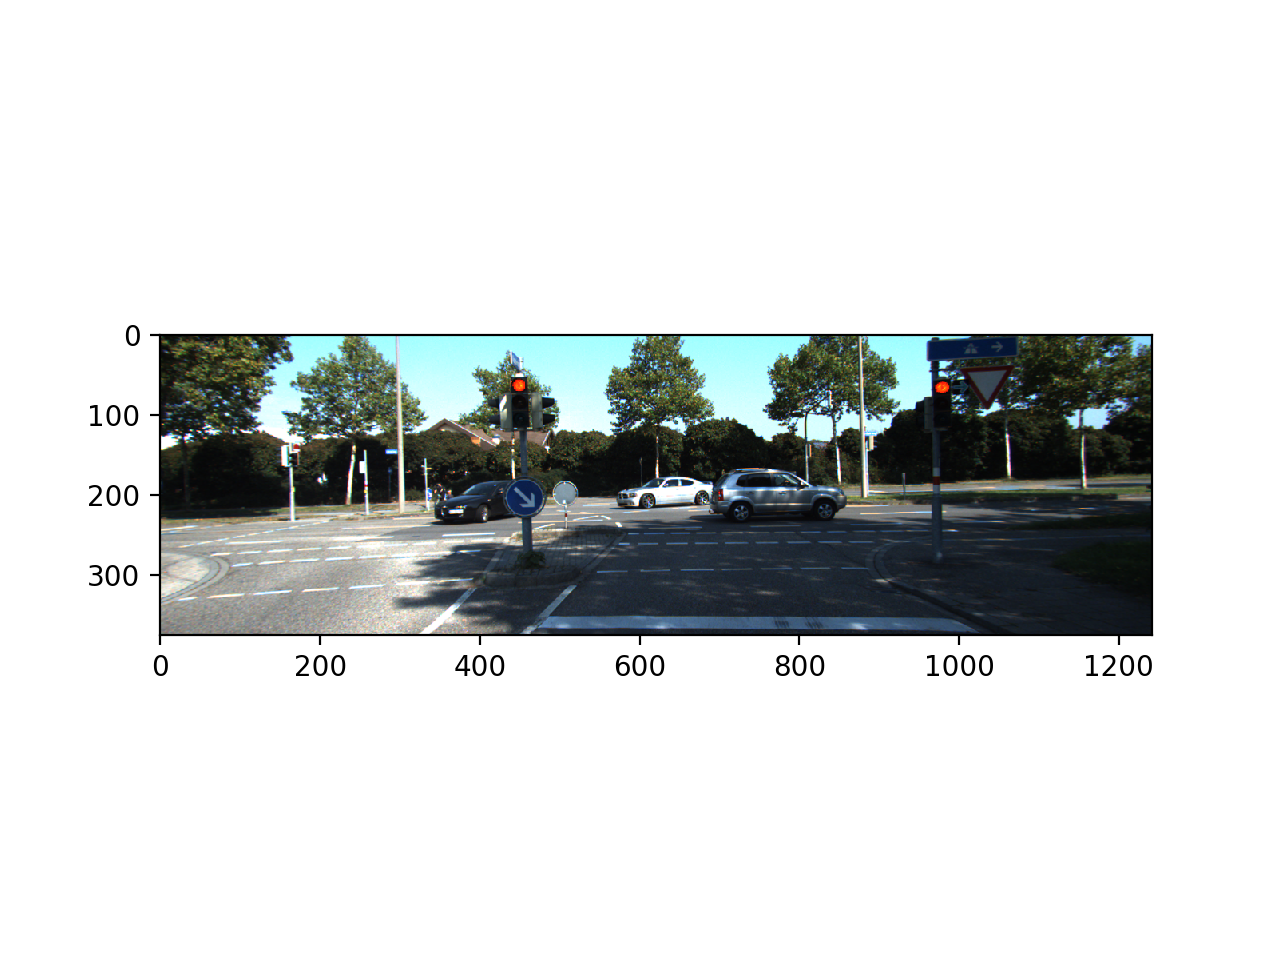

In [70]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

In [71]:
ax.clear();
image = ax.imshow(img);

In [72]:
new = skimage.color.rgb2luv(img)

<IPython.core.display.Javascript object>


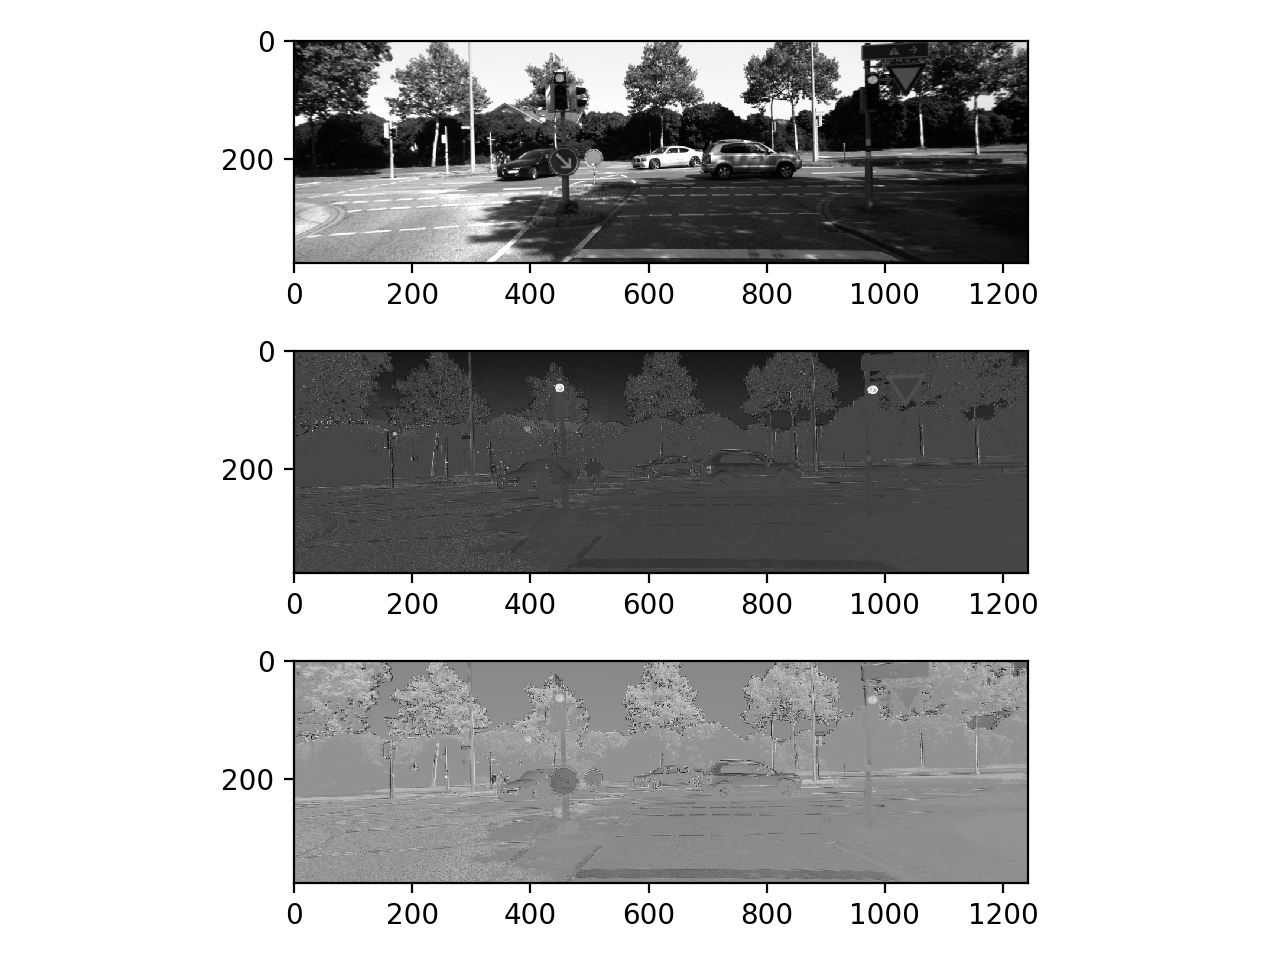

In [73]:
fig2 = plt.figure()
axL = fig2.add_subplot(3, 1, 1)
axU = fig2.add_subplot(3, 1, 2)
axV = fig2.add_subplot(3, 1, 3)
fig2.tight_layout()

In [74]:
L = np.dot(new, np.array([0.01, 0, 0]))
U = np.dot(new, np.array([0, 0.01, 0]))
V = np.dot(new, np.array([0, 0, 0.01]))
print(L.shape)

axL.clear(); axU.clear(); axV.clear();
axL.imshow(L, cmap='gray');
axU.imshow(U, cmap='gray');
axV.imshow(V, cmap='gray');

(375, 1242)


<IPython.core.display.Javascript object>


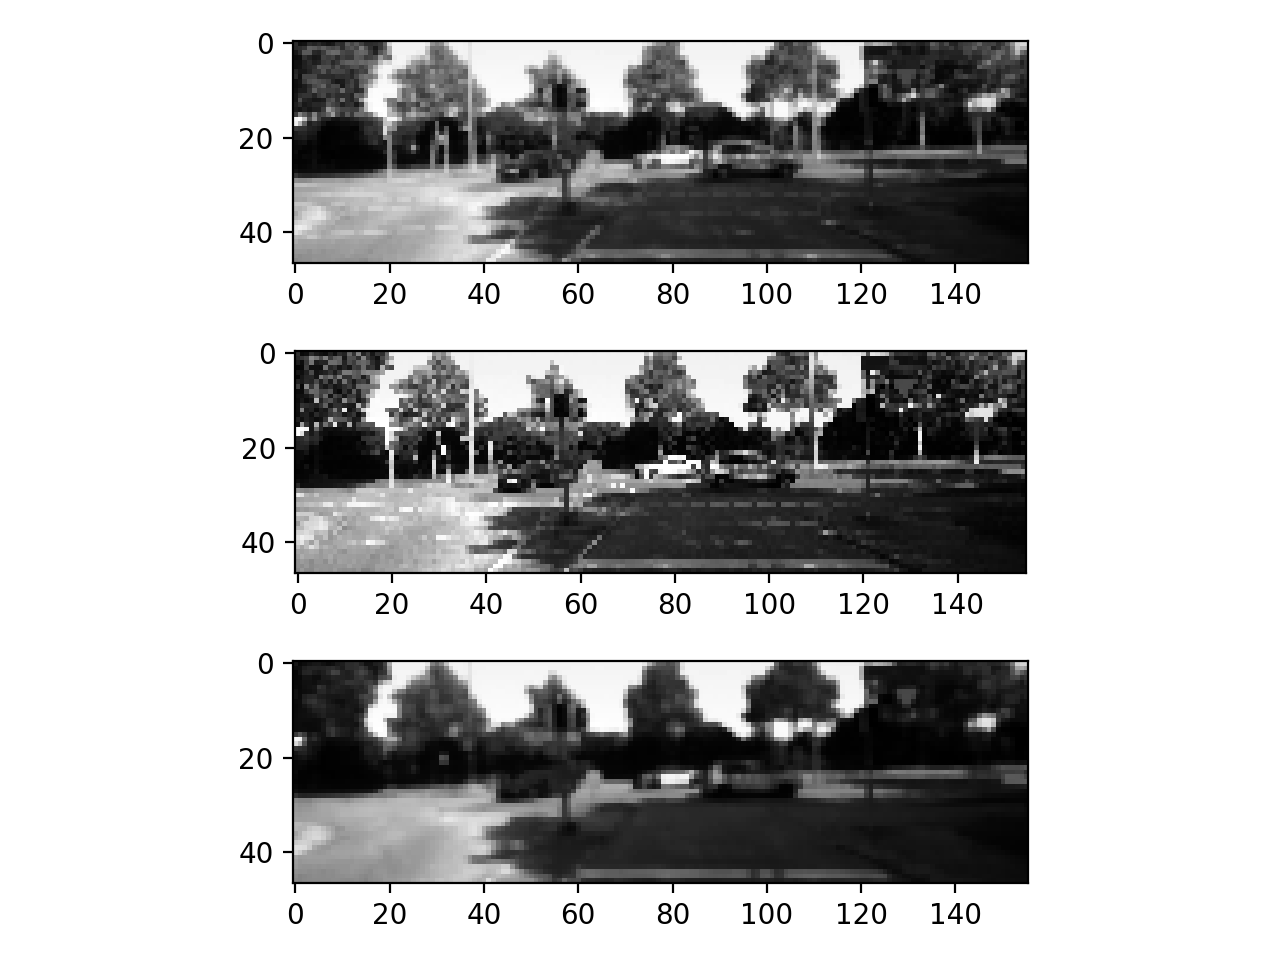

In [117]:
fig3 = plt.figure()
ax_down1 = fig3.add_subplot(3, 1, 1)
ax_down2 = fig3.add_subplot(3, 1, 2)
ax_down3 = fig3.add_subplot(3, 1, 3)
fig3.tight_layout()

In [189]:
L_down1 = sktr.pyramid_reduce(L, 8.0)
L_down2 = sktr.rescale(L, 1/8.0)
L_down3 = sktr.pyramid_reduce(skimage.morphology.opening(L, skimage.morphology.square(10)), 8.0)
# use opening or closing in propotion to region size by segmentation

/Users/morpheby/workspace/py-venvs/morphe-mu/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


array([[ 8., -0.,  0.],
       [ 0.,  8.,  0.],
       [ 0.,  0.,  1.]])

In [190]:
ax_down1.clear(); ax_down2.clear(); ax_down3.clear();
ax_down1.imshow(L_down1, cmap='gray');
ax_down2.imshow(L_down2, cmap='gray');
ax_down3.imshow(L_down3, cmap='gray');